In [1]:
import numpy as np
import PIL
import os
import matplotlib.pyplot as plt
from PIL import Image


In [2]:
root = '/Users/alim/Documents/ECE637/hw6'
data = np.load('data.npy', allow_pickle=True)[()]
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'illum1', 'illum2', 'x', 'y', 'z'])

Text(0.5, 1.0, 'Color Matching Functions by Wavelength')

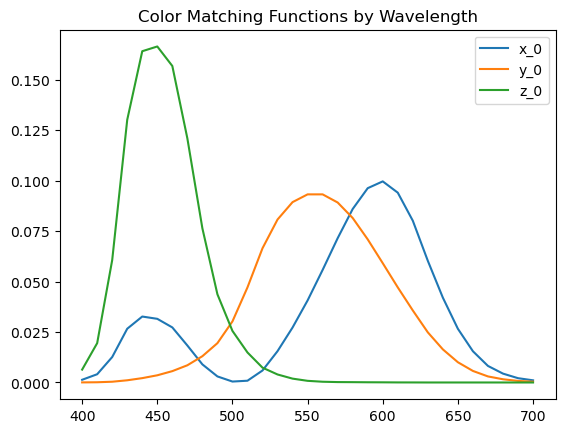

In [3]:
### Plot the 3 x0{lambda}, y0(lambda), z0(lambda) color matching functions versus wavelength, lambda.
wavelengths_axis = np.linspace(start = 400, stop = 700, num = 31)
wavelengths_axis = wavelengths_axis.reshape(31,)
X = data['x'].reshape(31,)
Y = data['y'].reshape(31,)
Z = data['z'].reshape(31,)
plt.plot(wavelengths_axis, X, label = "x_0")
plt.plot(wavelengths_axis, Y, label = "y_0")
plt.plot(wavelengths_axis, Z, label = "z_0")
plt.legend()
plt.title("Color Matching Functions by Wavelength")

Text(0.5, 1.0, 'Color Matching Functions')

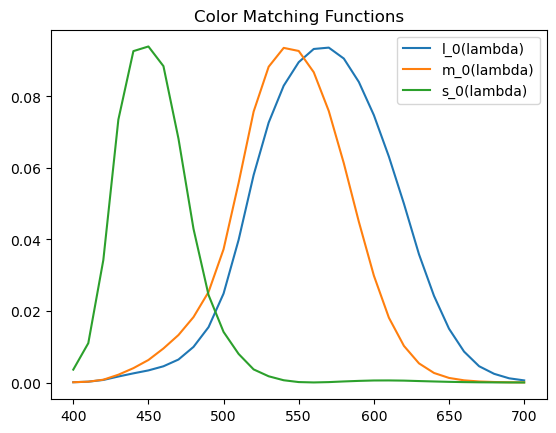

In [4]:
### Plot l0(lambda), m0(lambda), s0(lambda) corresponding to the long, med, short cones. 
### l0, m0, s0 are 1 x 31 row vectors containing properly normalized samples of the color matching functions.


A_inv = np.array([[0.2430, 0.8560, -0.0440], [-0.391, 1.1650, 0.0870], [0.0100, -0.0080, 0.5630]])
XYZ = np.vstack([X, Y , Z])
LMS = A_inv @ XYZ
L = LMS[0,:]
M = LMS[1, :]
S = LMS[2,:]

plt.plot(wavelengths_axis, L, label = "l_0(lambda)")
plt.plot(wavelengths_axis, M , label = "m_0(lambda)")
plt.plot(wavelengths_axis, S, label = "s_0(lambda)")
plt.legend()
plt.title("Color Matching Functions")

Text(0.5, 1.0, 'Radiant Light Energy from 2 Illuminant Sources')

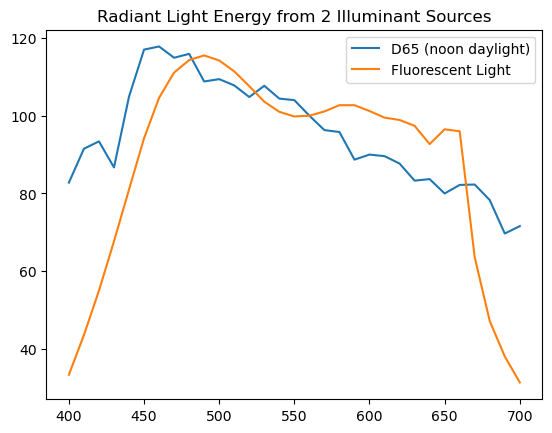

In [5]:
### Plot of D65 and fluorescent illuminants ###
ill_1 = data['illum1'].reshape(31,)
ill_2 = data['illum2'].reshape(31,)
plt.plot(wavelengths_axis, ill_1, label="D65 (noon daylight)")
plt.plot(wavelengths_axis, ill_2, label="Fluorescent Light")
plt.legend()
plt.title("Radiant Light Energy from 2 Illuminant Sources")

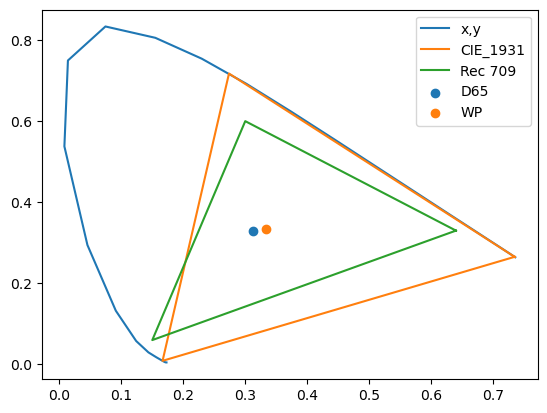

In [6]:
### Plot chromacticities (x,y) of a pure spectral source as a parametric function of lambda ###
#compute chromaticities (x, y)
x = X / (X + Y + Z)
y = Y / (X + Y + Z)
# plot them
plt.plot(x, y, label = "x,y")

#plot the three CIE 1931 and standard RGB primaries using chromaticities given in eq 18. 
R_CIE_1931 = np.array([0.73467, 0.26533, 0.0])
G_CIE_1931 = np.array([0.27376, 0.71741, 0.00883])
B_CIE_1931 = np.array([0.16658, 0.00886, 0.82456])
CIE_1931 = np.vstack([R_CIE_1931, G_CIE_1931, B_CIE_1931, R_CIE_1931])
plt.plot(CIE_1931[:,0], CIE_1931[:,1], label = "CIE_1931")

R_709 = np.array([0.64, 0.33, 0.03])
G_709 = np.array([.3, .6, .1])
B_709 = np.array([.15, .06, .79])
Rec_709 = np.vstack([R_709, G_709, B_709, R_709])
plt.plot(Rec_709[:,0], Rec_709[:,1], label = "Rec 709")

## Chromaticity of a D65 white point:
D65 = np.array([0.3127, 0.3290, 0.3583])
plt.scatter(D65[0], D65[1], label = "D65")

## Chromatcity of an equal energy white point:
EE_WP = np.array([0.3333, 0.3333, 0.3333])
plt.scatter(EE_WP[0], EE_WP[1], label = "WP")
plt.legend()


(170, 256, 31)
(170, 256, 31) <-- I.shape
XYZ_.shape (170, 256, 3)
(170, 256, 3) <-- XYZ_.shape
Transformation matrix to get from r,g,b to X,Y,Z: M 
 [[0.4123908  0.35758434 0.18048079]
 [0.21263901 0.71516868 0.07219232]
 [0.01933082 0.11919478 0.95053215]]
M's shape: (3, 3)
a pixel of XYZ_: (3,)
(3, 3) inverse's shape and the value is [[ 3.24096994 -1.53738318 -0.49861076]
 [-0.96924364  1.8759675   0.04155506]
 [ 0.05563008 -0.20397696  1.05697151]]
1.0000000000000018 1.1553475190440032e-14
1.0 1.1553475190440032e-14
gamma_corrected_rgb [[[ 99.  99.  99.]
  [ 99.  99.  99.]
  [ 99.  99.  99.]
  ...
  [ 99.  99.  99.]
  [ 99.  99.  99.]
  [ 99.  99.  99.]]

 [[ 99.  99.  99.]
  [ 99.  99.  99.]
  [ 97. 115. 117.]
  ...
  [102. 116. 111.]
  [104. 117. 113.]
  [101. 106. 105.]]

 [[ 99.  99.  99.]
  [101. 101. 101.]
  [153. 202. 201.]
  ...
  [178. 219. 205.]
  [179. 220. 206.]
  [125. 141. 136.]]

 ...

 [[ 99.  99.  99.]
  [101. 101. 101.]
  [203. 255. 241.]
  ...
  [215. 255. 237.]


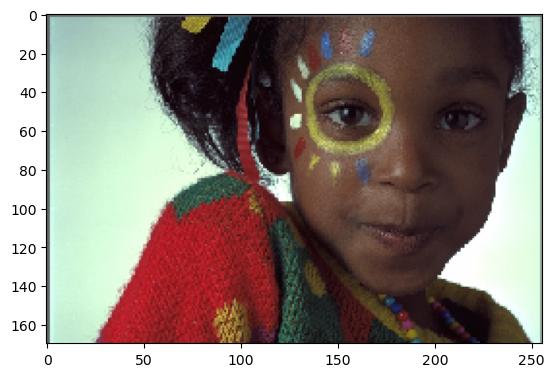

In [41]:
### Rendering an image from Illuminant, Reflectance and Color Matching Functions ###
reflect = np.load('reflect.npy', allow_pickle = True)[()]
print(reflect['R'].shape)

img = Image.open('img.tif')
#display(img)
np_img = np.array(img)

## will need to use equation 1: I(lambda) = R(lambda) * S(lambda)
#using the D65 light source (illum1), and R, compute reflected light E at each wavelength for each pixel in img.

data['illum1'].shape

## part 2
I = reflect['R']  * data['illum1']  #I = S(lambda) * R(lambda). R is reflectance for each point of image
# S is light source's energy density. 
print(I.shape, "<-- I.shape")


## part 3 - computing XYZ tristimulus values: Now, compute the XYZ tristimulus values for each pixel by 
#applying the color matching functions to the spectral energy in I. Call the output XYZ. Shape should be m x n x 3
# XYZ = np.zeros((170,256,3))
# for i in range(170):
#     for j in range(256):
#         XYZ[i,j,:] = np.vstack([data['x'], data['y'], data['z']]) @ I[i,j,:]
#print(XYZ.shape)
        
XYZ_ = np.empty((reflect['R'].shape[0], reflect['R'].shape[1], 3))
# f = np.empty((reflect['R'].shape[0], reflect['R'].shape[1], 3))
print("XYZ_.shape", XYZ_.shape)

for m in range(reflect['R'].shape[0]):
    for n in range(reflect['R'].shape[1]):
        XYZ_[m,n,0] = sum((I[m,n,:] * X).reshape((31,)))
        XYZ_[m,n,1] = sum((I[m,n,:] * Y).reshape((31,)))
        XYZ_[m,n,2] = sum((I[m,n,:] * Z).reshape((31,)))
print(XYZ_.shape, "<-- XYZ_.shape")
#plt.imshow(XYZ_)

#part 4:
### Assuming computer monitor uses Rec_709 RGB primaries and has a D65 white piont, compute transformation matrxi
#M709_D65 that will transform XYZ to this RGB space. 

# To compute scaling coeff, we need to multiply R_709, G_709, B_709's matrix inv with [xwp/ywp, 1, zwp/y/wp]
# To compute M, we need to apply R_709, G_709, B_709 with the matrix whose scaling coeffs are on a diagonal.


Rec_709 = np.array([[0.64, 0.3, 0.15], [.33, .6, .06], [0.03, 0.1, 0.79]])
#print("Rec_709", Rec_709)
#print("Rec_709 inverse:", np.linalg.inv(Rec_709))
#print("D65", D65[0], D65[1])

XYZ_whitepoint = np.array([D65[0]/ D65[1], 1, D65[2] / D65[1]])
XYZ_whitepoint = XYZ_whitepoint.reshape(3,1)

#print(XYZ_whitepoint, "this is XYZ_ whitepoint")

scaling_coeff = np.linalg.inv(Rec_709) @ XYZ_whitepoint
#print("scaling_coeff", scaling_coeff)
#create a diagonal matrix from coeff: 
scaling_coeff_mat = np.diag([scaling_coeff[0,0], scaling_coeff[1,0], scaling_coeff[2,0]])
#print(scaling_coeff_mat)
M709_D65 = Rec_709 @ scaling_coeff_mat
print("Transformation matrix to get from r,g,b to X,Y,Z: M",'\n', M709_D65)

"""
I think I am doing something wrong here, as the inner product between the inverse matrix row and the XYZ
tristimulu value at that pixel only gets values between 0 and 20 a
"""

#part 5:
#Use M709_D65 to transform each pixel in XYZ array into RGB
print("M's shape:", M709_D65.shape)
print("a pixel of XYZ_:", XYZ_[0,0,:].shape)
inv = np.linalg.inv(M709_D65)
print(inv.shape, "inverse's shape and the value is", inv)
rgb_ = np.empty((170,256,3))
for i in range(170):
    for j in range(256):
        rgb_[i,j,0] = np.inner(inv[0] , XYZ_[i,j,:])
        rgb_[i,j,1] = np.inner(inv[1] , XYZ_[i,j,:])
        rgb_[i,j,2] = np.inner(inv[2] , XYZ_[i,j,:])
        
print(np.max(rgb_), np.min(rgb_))
rgb_ = np.clip(rgb_, 0, 1)
print(np.max(rgb_), np.min(rgb_))

rgb_ = rgb_ * 255 #multiply image from 0 to 1 to 0 to 255. 
#gamma correct image with gamma = 2.2
gamma = 2.2
gamma_corrected_rgb =  255 * (rgb_/255.0) ** (1.0/gamma)
print("gamma_corrected_rgb", gamma_corrected_rgb)
plt.imshow(np.uint8(gamma_corrected_rgb))


In [42]:
x1, y1 = np.meshgrid(np.arange(0, 1.005, 0.005), np.arange(0, 1.001, 0.005))
z1 = 1 - x1 - y1

(3,)
(3,)


Text(0.16, 0.039999999999999994, 'Blue_REC709')

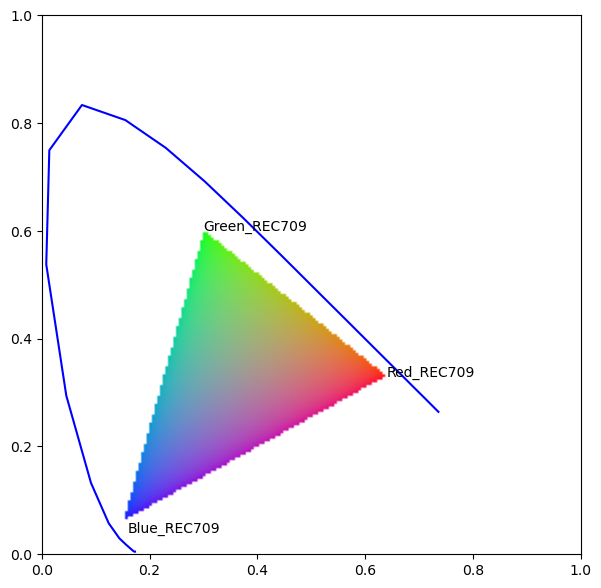

In [75]:
M_709 = np.array([[0.64, 0.3, 0.15], 
                 [0.33, 0.6, 0.06], 
                 [0.03, 0.1, 0.79]])
M_709 = np.linalg.inv(M_709)

RGB_new = np.zeros((z1.shape[0], z1.shape[1], 3))

for i in range(z1.shape[0]):
    for j in range(z1.shape[1]):
        RGB_new[i,j, :] = np.dot(M_709, np.array([x1[i,j], y1[i,j], z1[i,j]]).T)
        

RGB_new[RGB_new[:,:,0] < 0, :] = 1
RGB_new[RGB_new[:,:,1] < 0, :] = 1
RGB_new[RGB_new[:,:,2] < 0, :] = 1

img = (255 * np.power(RGB_new, np.ones_like(RGB_new) / gamma)).astype(np.uint8)
plt.figure(figsize = (7,7))
plt.imshow(img, extent=[0,1,0,1], origin="lower")

R_709 = np.array([0.64, 0.33, 0.03])
G_709 = np.array([.3, .6, .1])
B_709 = np.array([.15, .06, .79])

"""
R_709 = np.array([0.640, 0.300, 0.150])
G_709 = np.array([0.330, 0.6, 0.060])
B_709 = np.array([0.03, 0.10, 0.790])

"""


plt.plot(x.reshape((31,1)), y.reshape((31,1)), "blue", label = "pure spectarl source")
print(R_709.shape)
print(G_709.shape)
# print(B_709.shape)
plt.plot(R_709[0], R_709[1])
plt.text(R_709[0], R_709[1], "Red REC709")
plt.plot(G_709[0], G_709[1])
plt.text(G_709[0], G_709[1], "Green REC709")
plt.plot(B_709[0], B_709[1])
plt.text(B_709[0] + 0.01, B_709[1]-0.02, "Blue REC709")
#plt.plot(Rec_709[:,0], Rec_709[:,1], label = "Rec 709")
#plt.plot(Rec_709[:,0], Rec_709[:,1], label = "Rec 709")